In [117]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Timestamp

In [2]:
from datetime import date

today = date.today() # date object
# Format
date_formatted = today.strftime("%m-%d-%Y")

# Loading the csv file

In [5]:
df = pd.read_csv('COVID19_{}.csv'.format(date_formatted))
df.set_index('case_no', inplace=True) #making case no as index

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,date,age,gender,nationality,hospital_admitted_to,had_recent_travel_history_abroad,status,other_information,resident_of
case_no,,,,,,,,,
1,2020-01-30,38,F,Chinese,"San Lazaro Hospital, Manila",Yes,Recovered,First case of COVID-19 in PH,NaN
2,2020-01-30,44,M,Chinese,"San Lazaro Hospital, Manila",Yes,Died,First COVID-19-related death in PH; first outs...,NaN
3,2020-01-30,60,F,Chinese,ACE Medical Center - Bohol,Yes,Recovered,Left the Philippines to China before was repor...,NaN
4,2020-03-05,48,M,Filipino,University of the East Ramon Magsaysay Memoria...,Yes,Recovered,First case involving a Filipino in the Philipp...,NaN
5,2020-03-05,62,M,Filipino,Research Institute for Tropical Medicine,No,Died,Resident of Cainta; frequented Greenhills Mall...,NaN
6,2020-03-06,59,F,Filipino,Research Institute for Tropical Medicine,No,Died,Resident of Cainta,NaN
7,2020-03-08,38,M,Taiwanese,Research Institute for Tropical Medicine,No,Recovered,Has contact with a Taiwanese national who test...,NaN
8,2020-03-08,32,M,Filipino,St. Luke's Medical Center - Global City,Yes,Admitted,-,NaN
9,2020-03-08,86,M,American,The Medical City - Ortigas,Yes,Died,dual citizen (Fil-Am) according to Mayor Marcy...,NaN


In [7]:
len(df)

1546

# Analysis

## Date vs New Cases

In [ ]:
dates = np.unique(np.array(df.date)) # chronological order

new_cases_per_date = [len(df[df.date==dates[i]]) for i in range(0, len(dates))] # number of new cases each day

new_df = pd.DataFrame(list(zip(dates, new_cases_per_date)), columns=['Date','New_Cases'])

In [ ]:
new_df.head()

## Date vs Total Cases

In [ ]:
total_cases = []
total_cases_per_day = 0 
for i in range(0, len(new_df)):
    total_cases_per_day += new_df.New_Cases[i]
    total_cases.append(total_cases_per_day)

In [ ]:
new_df['Total_Cases'] = total_cases
new_df.tail()

# Not including the 5

In [ ]:
dataframe_plot1 = new_df[4:]
dataframe_plot1.head()

# Plots

### Removing the 2020

In [ ]:
for i in range(4, len(np.unique(dataframe_plot1.Date))+4):
    dataframe_plot1.Date[i] = dataframe_plot1.Date[i][5:len(dataframe_plot1.Date[i])]

In [ ]:
dataframe_plot1.tail()

In [ ]:
fig = plt.figure()
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-pastel')

ax = fig.add_subplot(1,1,1)  

# x-axis: date, y-axis:count

## Total Cases in hundreds
ax.plot(dataframe_plot1.Date, dataframe_plot1.Total_Cases/100, lw=1.5,marker='o', label='Cumulative')

## New cases each day in hundreds
ax.vlines(dataframe_plot1.Date, ymin=0, ymax=dataframe_plot1.New_Cases/100,colors='#ff4d4d',
          label='New')#marker='o', 
ax.scatter(dataframe_plot1.Date, dataframe_plot1.New_Cases/100, color='#ff4d4d', marker='D')


# Time stamp
ax.text(len(dataframe_plot1.Date)-3.7, -3, 'As of {}'.format(date_formatted), fontsize=8)

ax.set_title("Number of Confirmed Cases")
ax.set_xlabel("Date")
ax.set_ylabel("Number (in hundreds)")

frequency=3
plt.xticks(dataframe_plot1.Date[::frequency], rotation=20)
plt.legend()
plt.grid(True)

In [ ]:
plt.savefig('images/total_cases', dpi=300, bbox_inches='tight')

# Number of Cases since case 6

In [ ]:
fig = plt.figure()
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-pastel')

ax = fig.add_subplot(1,1,1)  


days = [i for i in range(0, len(dataframe_plot1))]
ax.plot(days, dataframe_plot1.Total_Cases / 100, color='#ff1a1a',marker='o',lw=2)

ax.set_title("Total Confirmed Cases")
ax.set_xlabel("Days Since the 6th Case (03-07-2020)")
ax.set_ylabel("Number (in Hundreds)")
ax.set_xlim(0,np.max(days)+1)
ax.set_ylim(0,np.max(dataframe_plot1.Total_Cases)/100 + 1.3)


# Removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

new_unique_cases = dataframe_plot1.iloc[-1].Total_Cases - dataframe_plot1.iloc[-2].Total_Cases
ax.text(x=2, y=4.7, s='{} new cases\non {}'.format(new_unique_cases, date_formatted), fontsize=12, horizontalalignment='left',
        verticalalignment='top')

# Putting the current total number cases as text
ax.text(x=days[np.argmax(days)]-0.5, y=dataframe_plot1.Total_Cases[np.argmax(days)+4]/100+0.2, 
        s=dataframe_plot1.Total_Cases[np.argmax(days)+4], fontsize=12)

frequency = 3
plt.xticks(days[::frequency])

# Putting horizontal grid
plt.grid(True, which='major', axis='y')


# v and h lines at the current datepoint
#plt.axvline(x=np.max(days),lw=0.8, ls=':')
#plt.axhline(y=5.5,lw=0.8, ls=':')

In [ ]:
plt.savefig('images/total_cases_since6th', dpi=300)

# Age analysis

In [ ]:
df.age.value_counts()

In [ ]:
ages = df.copy().age
ages = np.array([int(i) for i in ages[ages!='TBA']]) #removing TBA (for validation)

num_TBA = len(df) - len(ages)
num_TBA

In [ ]:
fig = plt.figure()

plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')

ax = plt.subplot(111)

bins = np.array([10, 20, 30, 40, 50,60,70,80,90,100])
n, bins, patches = ax.hist(ages, bins, histtype='bar', color='#936ED4',rwidth=0.8, align='left') #, color='#a500ff'
patches[np.argmax(n)].set_fc('#FCB249') #color the highest

# label each bar with each count
for index, bin_ in enumerate(bins):
    if bin_== 100:
        break
        
    ax.text(bin_, n[index] + 4, int(n[index]), 
            color='black', fontweight='bold', 
            horizontalalignment='center', verticalalignment='center')

#Styling
if num_TBA == 0:
    ax.set_title('Number of Infected Per Age Group')
else:
    ax.set_title('Number of Infected Per Age Group ({} for validation)'.format(num_TBA))
    
# xtick labels
plt.xticks(bins)
ax.set_xlim(0,99.9)
ax.set_ylim(0,np.max(n)+12)
    
# Removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Removing yticks
ax.get_yaxis().set_visible(False)

# Removing ticks
ax.tick_params(axis=u'both', which=u'both',length=0)

# Time stamp
ax.text(83, -20, 'As of {}'.format(date_formatted), fontsize=8)



# Draw the plot first then adjust the ticklabels
fig.canvas.draw()
labels = np.array([item.get_text() for item in ax.get_xticklabels()])
new_labels = []
for i in range(0,len(labels)):
    new_labels.append(labels[i] + 's')
ax.set_xticklabels(new_labels)


plt.savefig('images/num_infected',  dpi=500, bbox_inches='tight')

In [ ]:
sum(n)+num_TBA # sanity check, total cases

In [ ]:
#Sanity check

g = [60 <= i <= 69 for i in ages]
sum(g)

### Deaths per age group

In [ ]:
deaths_age = np.array([int(i) for i in df[df.status=='Died'].age])

deaths_age

In [ ]:
g = [60 <= i <= 69 for i in deaths_age ]
sum(g) #sanity check

In [ ]:
fig = plt.figure()
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')
ax = plt.subplot(111)

bins = np.array([30,40,50,60,70,80,90])
n, bins, patches = ax.hist(deaths_age, bins, histtype='bar', color='#87DCC0', rwidth=0.8, align='left')

ax.set_title('Deaths Per Age Group')
ax.set_ylim(0,np.max(n)+2.5)

patches[np.argmax(n)].set_fc('#998AD3') #color the highest

# Removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Removing yticks
ax.get_yaxis().set_visible(False)

# Removing ticks
ax.tick_params(axis=u'both', which=u'both',length=0)

# label each bar with each count
for index, bin_ in enumerate(bins):        
    if index == len(n):
        break
        
    ax.text(bin_, n[index] + 0.3, int(n[index]), 
            color='black', fontweight='bold', 
            horizontalalignment='center', verticalalignment='center')
    
ax.text(76, -2.5, 'As of {}'.format(date_formatted), fontsize=8)


# Draw the plot first then adjust the ticklabels
fig.canvas.draw()
labels = np.array([item.get_text() for item in ax.get_xticklabels()])
new_labels = []
for i in range(0,len(labels)):
    new_labels.append(labels[i] + 's')
ax.set_xticklabels(new_labels)


plt.savefig('images/death_age_gp', bbox_inches='tight')

In [ ]:
# Sanity check

np.sum(n) == len(df[df.status=='Died'])

In [ ]:
np.sum(deaths_age >= 60) / len(deaths_age)

of the deaths come from the 60+ age group. 

# Travel History Doughnut plot

In [ ]:
trav = df['had_recent_travel_history_abroad'].value_counts()
trav

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')
 
# Create a pieplot
plt.pie(trav,labels=np.array(trav.index), autopct='%1.1f%%', startangle=150, pctdistance=0.85) 
    
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Infected Who Had Travel History Abroad')

# Map Hospitals

In [8]:
df_hospital_directory = pd.read_csv('hospital_directory_{}.csv'.format(date_formatted))
df_hospital_directory.head()

,df_Address,complete_address,province,latitudes,longitudes,counts
0,ACE Dumaguete Doctors,"ACE Dumaguete Doctors, Claytown Road, Claytown...",Negros Oriental,9.317358,123.295973,1
1,ACE Medical Center - Bohol,"ACE Medical Center, Carlos P. Garcia East Aven...",Bohol,9.634498,123.869298,1
2,ACE Medical Center - Pateros,"Allied Care Experts (ACE) Medical Center, P. H...",Metropolitan Manila,14.544085,121.065217,1
3,Adventist Medical Center - Manila,"Adventist Medical Center Manila, 1945, Donada,...",Metropolitan Manila,14.556022,120.995301,3
4,Alabang Medical Clinic,"Alabang Medical Clinic, Country Drive, Country...",Metropolitan Manila,14.391035,121.044319,1


In [9]:
from mpl_toolkits.basemap import Basemap
import shapefile

# Loading the shapefile
phl1 = shapefile.Reader("Shapefiles/gadm36_PHL_1") 

<IPython.core.display.Javascript object>


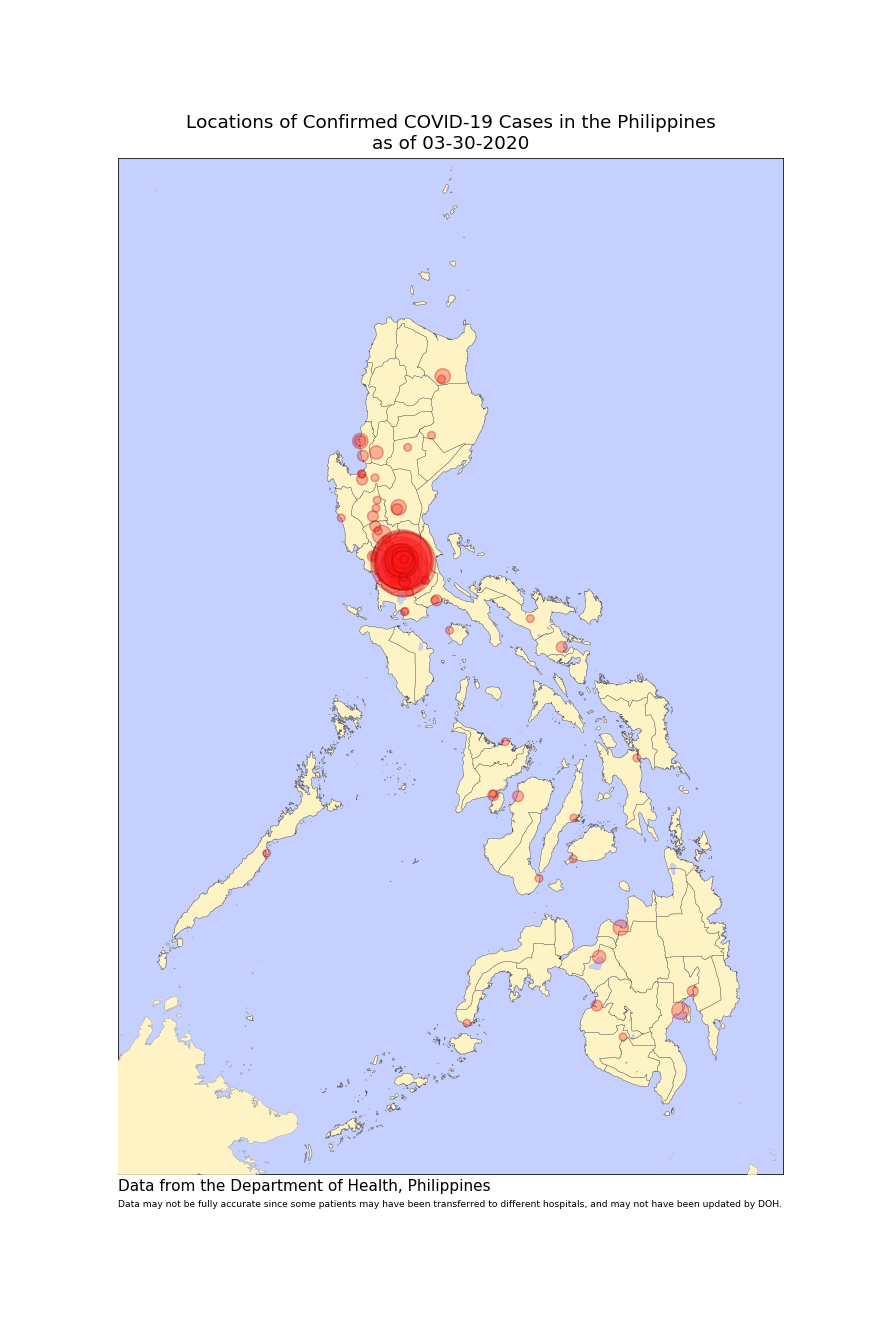

C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 1.0, 'Locations of Confirmed COVID-19 Cases in the Philippines\nas of 03-30-2020')

In [11]:
fig, ax = plt.subplots(figsize=(8,12))

# default coords: llcrnrlon=115,llcrnrlat=3.5, urcrnrlon=129, urcrnrlat=22, lat_0 = 14, lon_0 = 120
m = Basemap(llcrnrlon=116.3,llcrnrlat=4.4, urcrnrlon=127.8, urcrnrlat=21.1, resolution='f',
                projection='tmerc', lat_0 = 14, lon_0 = 120) 

# Reading the shapefile
m.readshapefile('Shapefiles/gadm36_PHL_1','PHL_adm1', linewidth=0.2, color="#555555", zorder=2)


# Design
m.fillcontinents(color='#FEF3C5', lake_color='#c5d0fe')
m.drawmapboundary(fill_color='#c5d0fe')
m.drawcoastlines(color='#555566', linewidth=0.1)
#m.drawrivers()

# Conversion of lats longs wrt to the projection
xpt,ypt = m(np.array(df_hospital_directory.longitudes), np.array(df_hospital_directory.latitudes))

# Scatter plot of locations
ax.scatter(xpt, ypt, c='#ff1a1a', alpha=0.3, edgecolor='#990000', 
           s=df_hospital_directory.counts*25, zorder=10)

# Data source
ax.text(0, -30000, 'Data from the Department of Health, Philippines')
ax.text(0, -60000, 'Data may not be fully accurate since some patients may have been transferred to different hospitals, and may not have been updated by DOH.',
        fontsize=6)

# Removing border
plt.box(False)
ax.set(frame_on=False)

ax.set_title('Locations of Confirmed COVID-19 Cases in the Philippines\nas of {}'.format(date_formatted))

In [12]:
plt.savefig('images/map_of_cases', dpi=800, bbox_inches='tight')

# Provinces with a positive case

In [67]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

In [116]:
df_hospital_directory

,df_Address,complete_address,province,latitudes,longitudes,counts
0,ACE Dumaguete Doctors,"ACE Dumaguete Doctors, Claytown Road, Claytown...",Negros Oriental,9.317358,123.295973,1
1,ACE Medical Center - Bohol,"ACE Medical Center, Carlos P. Garcia East Aven...",Bohol,9.634498,123.869298,1
2,ACE Medical Center - Pateros,"Allied Care Experts (ACE) Medical Center, P. H...",Metropolitan Manila,14.544085,121.065217,1
3,Adventist Medical Center - Manila,"Adventist Medical Center Manila, 1945, Donada,...",Metropolitan Manila,14.556022,120.995301,3
4,Alabang Medical Clinic,"Alabang Medical Clinic, Country Drive, Country...",Metropolitan Manila,14.391035,121.044319,1
...,...,...,...,...,...,...
133,Veterans Memorial Medical Center,"Veterans Memorial Medical Center, North Avenue...",Metropolitan Manila,14.656373,121.039812,8
134,Victor R. Potenciano Medical Center,"Victor R. Potenciano Medical Center, 163, Sier...",Metropolitan Manila,14.576989,121.050027,9
135,West Metro Medical Center,"West Metro Medical Center, Veterans Avenue Ext...",Zamboanga del Sur,6.923505,122.079362,1
136,Western Visayas Medical Center,"Western Visayas Medical Center, Q. Abeto St., ...",Iloilo,10.718811,122.541787,1


In [103]:
unique_provs = np.unique(df_hospital_directory.province)
unique_provs

array(['Albay', 'Bataan', 'Batangas', 'Benguet', 'Bohol', 'Bulacan',
       'Cagayan', 'Camarines Sur', 'Capiz', 'Cavite', 'Cebu',
       'Davao del Norte', 'Davao del Sur', 'Iloilo', 'Isabela',
       'La Union', 'Laguna', 'Lanao del Sur', 'Leyte', 'Maguindanao',
       'Marinduque', 'Metropolitan Manila', 'Misamis Oriental',
       'Negros Occidental', 'Negros Oriental', 'Nueva Ecija',
       'Nueva Vizcaya', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon',
       'Rizal', 'Sultan Kudarat', 'Tarlac', 'Zambales',
       'Zamboanga del Sur'], dtype=object)

<IPython.core.display.Javascript object>


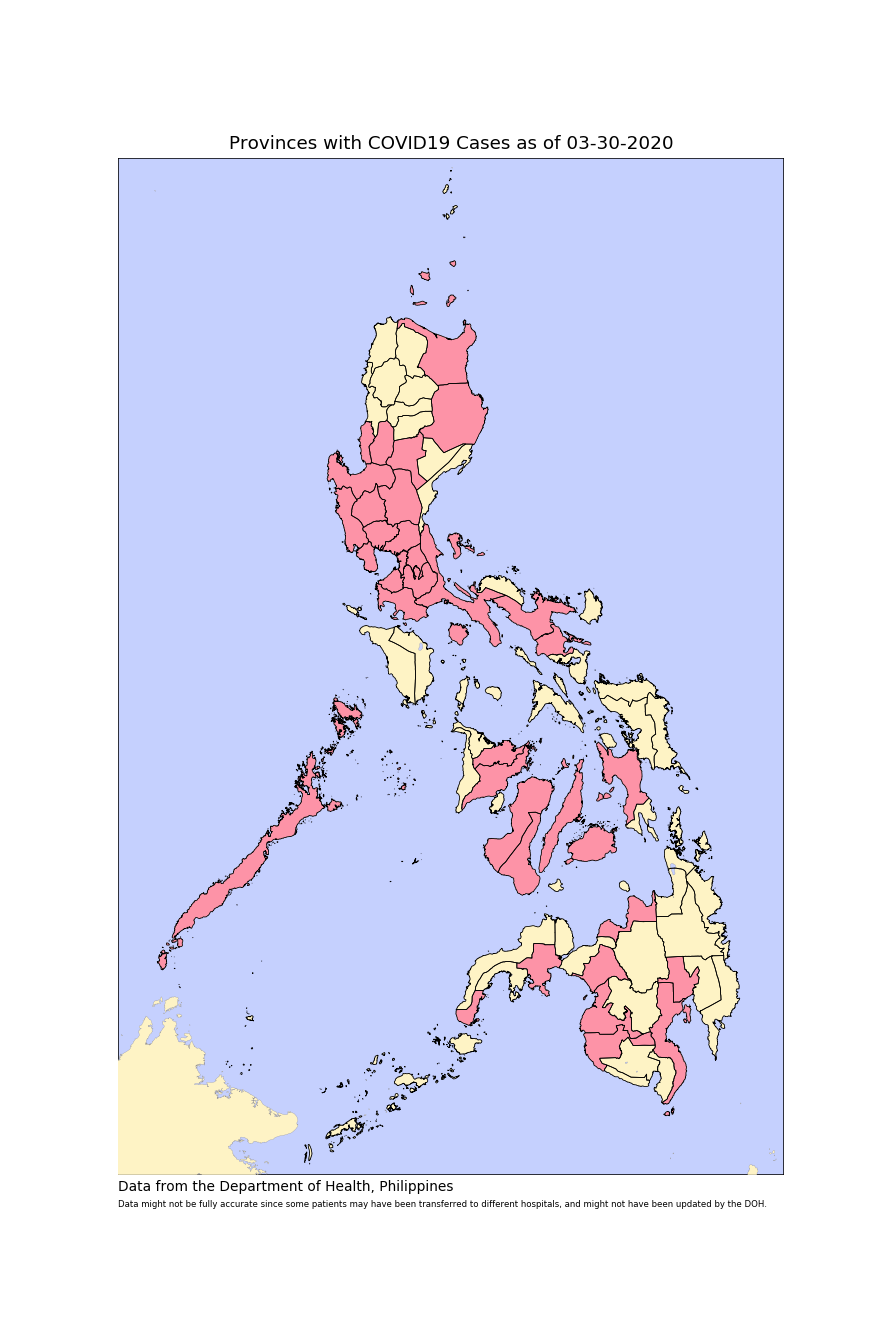

C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


[None]

In [114]:
fig, ax = plt.subplots(figsize=(8,12))

plt.title('Provinces with Confirmed COVID19 Cases as of {}'.format(date_formatted))

# default coords: llcrnrlon=115,llcrnrlat=3.5, urcrnrlon=129, urcrnrlat=22, lat_0 = 14, lon_0 = 120
m = Basemap(llcrnrlon=116.3,llcrnrlat=4.4, urcrnrlon=127.8, urcrnrlat=21.1, resolution='f',
                projection='tmerc', lat_0 = 14, lon_0 = 120) 

# Design
m.fillcontinents(color='#FEF3C5', lake_color='#c5d0fe')
m.drawmapboundary(fill_color='#c5d0fe')
m.drawcoastlines(color='#555566', linewidth=0.1)

# Reading the shapefile, not drawing the borders
m.readshapefile('Shapefiles/gadm36_PHL_1','shf', drawbounds = False)

# Coloring the provinces with a COVID19 case
patches   = []
for info, shape in zip(m.shf_info, m.shf):
    for i in unique_provs:
        if info['NAME_1'] == i:
            patches.append(Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor='#fd93a7', linewidths=0.1, zorder=2))

# Now we draw the borders
m.readshapefile('Shapefiles/gadm36_PHL_1','shf', drawbounds = True)

# Data source
ax.text(0, -30000, 'Data from the Department of Health, Philippines', fontsize=9)
ax.text(0, -60000, 'Data might not be fully accurate since some patients may have been transferred to different hospitals, and might not have been updated by the DOH.',
        fontsize=5.6)

# Removing border
plt.box(False)
ax.set(frame_on=False)

In [115]:
plt.savefig('images/provinces_w_cases', dpi=800, bbox_inches='tight')

# Folium interactive

# Deaths and Recoveries

In [ ]:
df.status.value_counts()

In [ ]:
df_died = df[df.status=='Died'][['other_information']].copy()
df_died.tail()

In [ ]:
for i in df_died.other_information:
    print(i)

### Regular expressions

In [ ]:
import re

In [ ]:
# We get the date of death for each case 

death_date = []

for i in df_died.other_information:
    ls = re.findall(r'[d|D]ied on (\w+\s\d+).?,?', i)
    death_date.append(ls[0])
    
df_died['death_date'] = death_date
df_died.death_date.head()

In [ ]:
unique_dates = np.unique(df_died.death_date)
unique_dates

In [ ]:
# Getting the deaths for each day

count_per_day = [np.sum(np.array(df_died.death_date) == i) for i in unique_dates]
count_per_day

In [ ]:
# Sanity check

np.sum(count_per_day)

In [ ]:
# Total deaths per day

total_deaths = []
i= 0
for k in count_per_day:
    i += k
    total_deaths.append(i)

### Chaning date format

In [ ]:
### Concatenating the 2020
unique_dates = [i + ', 2020' for i in unique_dates]
unique_dates

In [ ]:
from datetime import datetime
from datetime import date

unique_dates = [datetime.strptime(i, '%B %d, %Y').date().strftime("%m-%d") for i in unique_dates]
unique_dates

In [ ]:
df_deaths = pd.DataFrame(list(zip(unique_dates, count_per_day, total_deaths)), columns=['Date', 'New', 'Cumulative'])
df_deaths

In [ ]:
plt.figure()

ax = plt.subplot(111)
ax.plot(df_deaths.Date[1:], df_deaths.Cumulative[1:], marker='o', label='Cumulative')

## New deaths each day in hundreds
ax.vlines(df_deaths.Date[1:], ymin=0, ymax=df_deaths.New[1:],colors='#ff4d4d',
          label='New')#marker='o', 
ax.scatter(df_deaths.Date[1:], df_deaths.New[1:], color='#ff4d4d', marker='D')


ax.set_title('Deaths')
plt.legend()
frequency = 3
#plt.xticks(death_date.Date[1:][::frequency], rotation=30)
plt.grid(True)

# Recoveries

In [ ]:
df_recovered = df[df.status=='Recovered'][['date', 'other_information']].copy()
df_recovered.head()

In [ ]:
for i,j in enumerate(df_recovered):
    print(i, j)

In [ ]:
# # Test

# txt = 'discharged from hospital, and returned to China on January 31.'
# txt2 = 'A resident of Pasig. Recently traveled to Taiwan. Husband of Case No. 19. Experienced symptoms on February 26. Discharged on March 24.'

# re.findall(r"[D|d]ischarged(?:.+)on (.+).", txt)

In [ ]:
recovery_dates = []

for i, j in enumerate(df_recovered.other_information):
    if 'Diamond Princess' in j:
        recovery_dates.append(df_recovered.iloc[i].date)
    else:
        recovery_dates.append(re.findall(r"[D|d]ischarged(?:.+)on (.+).", j)[0])
        
#recovery_dates

In [ ]:
len(recovery_dates)

In [ ]:
# Editing out the diamond princess lines

recovery_dates[16] = 'March 10'
recovery_dates[17] = 'March 10'

In [ ]:
recovery_dates = np.array(recovery_dates)
recovery_dates

In [ ]:
np.unique(recovery_dates)

In [ ]:
# New cases per day

new_recoveries = [np.sum(recovery_dates==i) for i in np.unique(recovery_dates)]
new_recoveries

In [ ]:
df_recoveries = pd.DataFrame(zip(np.unique(recovery_dates), new_recoveries), columns=['Date', 'New'] )
df_recoveries